# Проект: Исследование стартапов
- Автор: Котова Ольга
- Дата: 27.02.2025

## Введение



<font color='#777778'>
Необходимо провести анализ данных для финансовой компании, которая предоставляет льготные займы стартапам и хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов.
    Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны. Данные неполны, поэтому заказчик, кроме ответа на некоторые интересующие его вопросы, просит аккуратно относиться к получаемым в процессе исследования значениям показателей и выводам и стараться оценивать их на возможные искажения.


### Цели и задачи проекта

<font color='#777778'>**Цель:** 
Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.  
2. Провести предобработку данных.  
3. Провести анализ данных и дать ответы на вопросы:  
•	по каким столбцам можно объединять данные из разных таблиц;  
•	можно ли доверять данным о сотрудниках стартапов и их образовании;  
•	что значат покупки за 0 или за 1 доллар;  
•	какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;  
•	как рассчитать и отобразить численные показатели и динамику.  
4. Сформулировать выводы по проведённому анализу: возможно ли выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании.</font>

### Описание данных
<font color='#777778'>

Поступили следующие основные датасеты: 
- company_and_rounds.csv - cодержит информацию о компаниях и раундах финансирования,
- acquisition.csv - содержит информацию о покупках одними компаниями других компаний,  
- people.csv - cодержит информацию о сотрудниках,
- education.csv - cодержит информацию об образовании сотрудника,
- degrees.csv - cодержит информацию о типе образования сотрудника.

А также 2 дополнительных датасета:
<font color='#777778'>

**Описание датасета `acquisition`**:  
    
`id` — идентификатор покупки.  
`acquiring_company_id` — идентификатор покупающей компании.  
`acquired_company_id` — идентификатор покупаемой компании.  
`term_code` — варианты расчёта.  
`price_amount` — сумма сделки.   
`acquired_at` — дата сделки.  

**Описание датасета `company_and_rounds`**:
    
`company ID` — идентификатор компании.  
`name` — название компании.  
`category code` — категория области деятельности компании.  
`status` — статус компании.  
`founded at` — дата инвестирования.  
`closed at` — дата закрытия компании.  
`domain` — официальный сайт компании.  
`network username` — ник компании в сети.  
`country code` — код страны компании.  
`investment rounds` — число инвестиционных раундов.  
`funding rounds` — число раундов финансирования.  
`funding total` — сумма финансирования.  
`milestones` — вехи финансирования.  
`funding round id` — идентификатор этапа финансирования.  
`company id` — идентификатор компании.    
`funded at` — дата финансирования.  
`funding round type` — тип финансирования.  
`raised amount` — сумма финансирования.  
`pre money valuation`— предварительная денежная оценка.   
`participants` — число участников.    
`is first round` — является ли раунд первым.  
`is last round` — является раунд последним.  

**Описание датасета `education`**:
    
`id` — идентификатор записи об образовании.  
`person_id` — идентификатор работника.  
`instituition` — название учебного заведения.  
`graduated_at` — дата получения образования.  

**Описание датасета `people`**:  
    
`id` — идентификатор сотрудника.  
`first_name` — имя сотрудника.  
`last_name` — фамилия сотрудника.  
`company_id` — идентификатор компании.  
`network_username` — ник в социальных сетях.   

**Описание датасета `degrees`**: 
    
`id` — идентификатор записи.  
`object_id` — идентификатор сотрудника.  
`degree_type` — тип образования.  
`subject` — специальность.

### Содержимое проекта

Шаг 1. Знакомство с данными: загрузка и первичная предобработка.  
1.1. Вывод общей информации, исправление названия столбцов      
1.2. Смена типов и анализ пропусков


Шаг 2. Предобработка данных, предварительное исследование.  
2.1. Раунды финансирования по годам  
2.2. Люди и их образование  
2.3. Объединять или не объединять датасеты  
2.4. Проблемный датасет и причина возникновения пропусков  
    
Шаг 3. Исследовательский анализ объединённых таблиц    
3.1. Объединение данных  
3.2. Анализ выбросов  
3.3. Куплены забесплатно?      
3.4. Цены стартапов по категориям      
3.5. Сколько раундов продержится стартап перед покупкой  
    
Шаг 4. Итоговый вывод и рекомендации.</font>

---


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Начнём с загрузки библиотек и датасетов. Будем использовать pandas и библиотеки визуализации данных.


In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt

import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik==0.11.1
from phik import phik
from phik import resources


import warnings

# Отключаем предупреждения
warnings.filterwarnings('ignore')

In [2]:
# Выгружаем данные в переменные c названием, аналогичным таблицам
company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
people=pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education=pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees=pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

### 1.1. Вывод общей информации, исправление названия столбцов
Познакомимся с данными датасетов — выведем первые строки методом head(), а информацию о датафрейме методом info()

In [3]:
company_and_rounds.head(10)      

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaN,mywebbo.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaN,synergie-media.com,NaN,MAR,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,IND,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaN,NaN,hostnine.com,Hostnine,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
company_and_rounds.tail(10)

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
217764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,55358.0,269728.0,2013-08-14,series-a,5600000.0,0.0,7.0,1.0,1.0
217765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,55492.0,78698.0,2013-11-20,series-a,15000000.0,0.0,1.0,1.0,1.0
217766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56054.0,196289.0,2011-03-01,other,925000.0,0.0,0.0,1.0,1.0
217767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56158.0,282450.0,2013-11-26,series-a,2600000.0,0.0,0.0,1.0,1.0
217768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56184.0,146919.0,2013-11-06,other,4900000.0,0.0,0.0,1.0,1.0
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0
217773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,57063.0,284191.0,2013-12-04,venture,7000000.0,0.0,4.0,1.0,1.0


In [5]:
# Выводим информацию о датафрейме
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датасет `company_and_rounds.csv` содержит 22 столбца и 217774 строк, в которых представлена информация о компаниях и раундах финансирования.

После первичного анализа данных можно сделать следующие промежуточные выводы:

Названия столбцов не приведены к виду snake case, при чем содержат по 2 пробела в названиях, будем исправлять в дальнейшем.
Также обращает на себя внимание странное совпадение:
- с 1 по 12 столбец наиболее частое количество заполненных ячеек 217472. При выводе первых 15 строк заметим, что в столбцах с 13 и до конца есть значения только в том случае, если значения в `funding round id` разные. Данные в первых столбцах совпадают, изменяются только с 13 столбца, при этом, при совпадении id  вся информация по столбцам 1-12 дублируется в нескольких строках, если есть разные значения в `funding round id` различаются.
- Данные по столбцам `company  ID` и `company  id` совпадают.
- с 13 стоблца данные заполнены с одинаковым количеством пропусков - ненулевых 52928. Если выводим последние строки с помощью tail, видим, что первые столбцы все с пропусками.
 
Закрадывается догадка, что были объединены, но неверно, 2 датафрейма с разными данными.
Для тех компаний, у которых есть значение в `funding round id` - был отдельный датасет, с данными по этапам финансирования, сумме, участниках и тд. 
Поскольку там сохранены все данные по всем этапам (то есть несколько строк по одному и тому же айдишнику), скорее всего, было присоединение к этой таблице, через id компании, но раз подтянулись данные и по другим компаниям без информации с 13 столбца, предполагаем, что присоединяли через 'full join'. Что нашлось - то подтянулось, в остальных данных пропуски. Отсортирован датафрейм по возрастанию id компании.

Вероятно, стоит через срезы сделать 2 новых датафрейма и корректно их объединить в дальнейшем?

Относительно типов данных: 
- для id компании необходим целочисленный (в дальнейшем надо оценить, необходимо ли один из идентичных столбцов удалить)
- для `name`, `category  code`, `status`,  `domain`, `country  code`,`country  code`, `funding round type`- верный тип object 
- для `founded  at`, `closed  at`, `funded at` более подходит не числовой тип, а даты и времени (если будут необходимы для анализа, следует заменить).  
- для столбцов `investment  rounds`,`funding  rounds`, `milestones`, `participants` можно установить int вместо float64.
- булевые значения в столбцах  `is  first  round` и `is  last  round` точно не нуждаются во  float64, необходимо заменить.
- остальные стоблцы можно оставить во float.

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
Посмотрим по числу раундов и вех, сколько их может быть? И какие виды статусов есть?

In [6]:
company_and_rounds['investment  rounds'].unique()

array([  0.,   1.,   3.,  32.,   2.,   4.,   9.,  30.,  17.,   7.,   6.,
         8.,  18.,   5.,  25.,  19.,  49.,  21.,  16.,  14.,  37.,  96.,
        22.,  10.,  12., 478.,  15.,  89.,  11.,  24., 297.,  20.,  29.,
       125.,  33.,  40.,  38.,  68.,  13.,  44.,  58.,  51.,  nan])

In [7]:
company_and_rounds['funding  rounds'].unique() 

array([ 3.,  0.,  1.,  5.,  2.,  7.,  4.,  6.,  8., 10.,  9., 13., 11.,
       15., 14., 12., nan])

In [8]:
company_and_rounds['milestones'].unique() 

array([ 5.,  0.,  4.,  1.,  3.,  2.,  6.,  8.,  7.,  9., nan])

Инвестиционные раунды и райнды финансирования - это точно разное. 
Загадночные ВЕХИ финансировнания - их всего 10: от 0 до 9.
И им всем однозначно хватит целочисленного формата.

Еще посмотрим по айдишникам компаний информацию о количестве уникальных.

In [9]:
company_and_rounds['company  id'].nunique() 

31939

In [10]:
company_and_rounds['company  ID'].nunique() 

196553

In [11]:
company_and_rounds['status'].unique() 

array(['operating', 'acquired', 'closed', 'ipo', nan], dtype=object)

Да, интересно. Компаний с информацией о них `company  id`(из 1-12 столбцов) гораздо меньше, чем компаний с данными о финансировании `company  ID`.
Вероятно, база с данными по компаниям с названиеми поломалась и ее восстановили на определенную дату из архива?   
А вот данные с данными по финансированию кажутся более полными.
И статусов немного, всего 4, но что значит какой статус? Предположить можно следующее: 
«действующий», «приобретенный», «закрытый», а «ipo» -IPO (initial public offering) — это первая публичная продажа акций неограниченному кругу лиц; листинг на фондовой бирже. Можем предположить, что статус приобретенный  ('acquired') говорит о том, что компанию купили, а значит, именно такие компании учитывая прицел заказчика на покупку, развитие и последующую перепродажу перспективных стартапов.

Перед переходом к следующему датасету, приведем названия столбцов в порядок. Поскольку столбцов много, лучше заменить не через словарь, а с помощью replace в функции. Однако, заметим, что при приведении к нижнему регистру будут идентичными стобцы с названиями компаний, в связи с чем lower использовать не будем на данном этапе. 

In [12]:
# Выводим названия столбцов датафрейма 
company_and_rounds.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [13]:
# Функция для преобразования названий в snake_case
def to_snake_case(s):
    # Заменяем пробелы
    return s.replace('  ', '_')

# Применяем функцию ко всем названиям столбцов
company_and_rounds.columns = [to_snake_case(col) for col in company_and_rounds.columns]

In [14]:
# Выводим названия столбцов после замены пробелов
company_and_rounds.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Названия столбов приведены к snake_case.

Теперь познакомимся с данными датасета acquisition.csv.

In [15]:
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [16]:
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


В `acquisition` 6 столбцов и 9407 строк.
Названия столбцов не надо корректировать.  

По типам данных вопрос к `acquired_at` - надо привести к datetime.
Также `price_amount` вызывает подозрение целочисленный тип.  
Остальные типы данных корректные.
Обратим внимание, здесь также идет речь про acquiring_company_id  и acquired_company_id, то есть частично находит подтверждение гипотеза про статус приобретенный ('acquired').  

Cудя по первому знакомству с данными, значения в столбцах соответствуют своему описанию. 
Посмотрим, какие бывают варианты расчета? 

In [17]:
acquisition['term_code'].unique() 

array([nan, 'cash', 'stock', 'cash_and_stock'], dtype=object)

4 варианта расчета, включая наличные.

Также посмотрим статистические данные по сумме покупки компании.

In [18]:
acquisition['price_amount'].describe()

count    9.407000e+03
mean     3.932965e+08
std      2.682198e+10
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.343200e+04
max      2.600000e+12
Name: price_amount, dtype: float64

Много нулевых значений при отсутствии пропусков в данных, 50 процентиль 0, но и максимальные суммы покупки компании впечатляют - 2 600 000 000 000!

Посмотрим на оставшиеся датасеты.


In [19]:
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [20]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [21]:
people['id'].nunique()

226708

В `people` 5 столбцов и 226709 строк. 
Столбцы названы корректно. Пропуски в имени незначительные, но есть многие сотрудники без наименования компании и никнейма. 
По типам данных столбец `company_id` надо привеcти к целочисленному типу, остальные корректные.
Cудя по первому знакомству с данными, значения в столбцах соответствуют своему описанию. 
Уникальных идентификаторов сотрудников 226708 - столько же, сколько строк без заголовка.  

В проекте используется несколько датасетов. При этом проверка данных довольно однотипная, т. е. можно автоматизировать анализ данных написав для этого отдельную функцию (или несколько функций), которая будет выводить общую информацию о датафрейме, подсчитывать процент пропусков по столбцам, проверять наличия дубликатов, подсчитывать число уникальных занчений в данных и т. д.
    
Ниже привожу пример такой функции:
    
```
def lookup_datasets(dfs, filenames=None):
    """
    Выводит информацию о датасетах из списка

    Parameters:
        dfs (list of pd.DataFrame): Список датафреймов для обработки.
        filenames (list of str): Список названий файлов (имена для отображения).
    """
    if filenames is None:
        filenames = [f"df_{i + 1}" for i in range(len(dfs))]

    for df, df_name in zip(dfs, filenames):
        print('-'*10,' '*5, df_name, ' '*5, '-'*10)

        # Пропущенные значения
        missing_data = df.isna().mean()
        missing_data_result = missing_data.apply(lambda x: f'{x:.2%}' if x > 0 else "")
        missing_data_name = "Пропущено" if missing_data.sum() > 0 else ""
        missing_data_result.name = missing_data_name

        # Типы данных
        dtypes_result = df.dtypes
        dtypes_result.name = "Тип данных колонки"
        fewest_nans_row = df.iloc[1:-1].isna().sum(axis=1).idxmin()

        values_type = df.loc[fewest_nans_row].map(type).T
        values_type.name = "Тип значения"

        # Объединяем результаты и пример данных
        result = pd.concat([
            dtypes_result, # типы
            values_type, # типы значений
            missing_data_result, # пропущенные значения
            df.iloc[0, :], # первая строка
            df.loc[fewest_nans_row].T, # полная строка
            df.iloc[-1, :] # последняя строка
        ], axis=1)

        display(result)

        # Проверка на полные дубликаты
        duplicates = df.duplicated().mean()
        if duplicates > 0:
            print(f'Полных дубликатов: {duplicates:.2%}')

        print()

# Проводим автоматический осмотр данных
column_counts = lookup_datasets(dfs.values(), dfs.keys())
```


In [22]:
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [23]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [24]:
education['person_id'].nunique()

68451

В `education` 4 столбцa и 109610 строк.   
И типы данных, и названия корректные. Пропуски в институте и годе окончания, не думаю, что имеют значение для анализа.  
Столбец `graduated_at` стоит привести к datetime при необходимости в анализе.
Cудя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.  
Обратим внимание, что число сотрудников с указанным образованием, полученных через уникальные значения в 'person_id'- 68 451, значительно меньше, чем id сотрудников в датафрейме `people` - 226 708.

In [25]:
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [26]:
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


В `degrees` 4 столбцa и 109610 строк - ровно как в `education`.
И типы данных, и названия корректные на 1 взгляд. 
Но! Обратим внимание на содержание столбца `object_id`: в нем идентификатор сотрудника прописан как p:6117. Надо убрать p: и в дальнейшем привести к целочисленному типу данных этот столбец из object.
Пропуски в институте `degree_type` и `subject`-посмотрим, необходимо ли с ними проводить работу по ходу анализа.
Cудя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

### 1.2. Смена типов и анализ пропусков

Обработаем типы данных в столбцах, которые хранят значения даты и времени - в датасетах, где это необходимо для анализа:  `company_and_rounds` для столбцов `founded_at`, `closed_at`, `funded_at`. Сначала приведем к типу datetime, далее выделяем год - тип данных станет float64, значит затем преобразуем год в целочисленный формат. Пропуски будеи менять на зашлушки=0, иначе код выдает ошибку.

Аналогично поработаем в датасете `acquisition` со столбцом `acquired_at`.

In [27]:
# Конвертация в datetime и выделение года из даты
for col in ['founded_at','closed_at','funded_at']:
    company_and_rounds[col] = pd.to_datetime(company_and_rounds[col]).dt.year   
    company_and_rounds[col]=company_and_rounds[col].fillna(0).astype(int)  # необходимо заменить пропуски, иначе выдает ошибку
# Вывод итога обработки
company_and_rounds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_ID           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           217774 non-null  int64  
 5   closed_at            217774 non-null  int64  
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id           52928 non-null   float64
 15  funded_at        

In [28]:
# Конвертация в datetime и выделение года из даты
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at']).dt.year   
acquisition['acquired_at']=acquisition['acquired_at'].fillna(0).astype(int)

# Вывод итога обработки
acquisition.info()
acquisition.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9407 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007
1,7,59,72,cash,60000000,2007
2,8,24,132,cash,280000000,2007
3,9,59,155,cash,100000000,2007
4,10,212,215,cash,25000000,2007


Отлично, с типом даты и времени в 2 датасетах разобрались, теперь указаны только года, что подходит для анализа, теперь перейдем к отработке типов данных в `company_and_rounds`:

In [29]:
for colu in ['company_ID', 'company_id', 
             'investment_rounds', 'funding_rounds', 'milestones', 'participants', 
             'is_first_round','is_last_round',]:
    company_and_rounds[colu] = company_and_rounds[colu].fillna(-1).astype(int)
    company_and_rounds[colu] = pd.to_numeric(company_and_rounds[colu], downcast='integer')


In [30]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_ID           217774 non-null  int32  
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           217774 non-null  int64  
 5   closed_at            217774 non-null  int64  
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217774 non-null  int16  
 10  funding_rounds       217774 non-null  int8   
 11  funding_total        217472 non-null  float64
 12  milestones           217774 non-null  int8   
 13  funding_round_id     52928 non-null   float64
 14  company_id           217774 non-null  int32  
 15  funded_at        

Для столбцов `investment_rounds`, `funding_rounds`, `milestones`, `participants` вместо float64 установлен подходящий оптимальный int. Булевые значения в столбцах `is_first_round` и `is_last_round` приведены к int8.  
Столбцы `company_ID`, `company_id` приведены к int32.

Данные стали как будто полнее, но отчасти за счет заглушек - установили их в значении -1.
Пропуски не удаляем совсем, максимально сохраняем данные на текущем этапе.



В `people` столбец `company_id` также приводим к целочисленному типу.

In [31]:
people['company_id'] = people['company_id'].fillna(-1).astype(int)
people['company_id'] = pd.to_numeric(people['company_id'], downcast='integer')

# Проверяем коррекность замены
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                226709 non-null  int64 
 1   first_name        226704 non-null  object
 2   last_name         226708 non-null  object
 3   company_id        226709 non-null  int32 
 4   network_username  38867 non-null   object
dtypes: int32(1), int64(1), object(3)
memory usage: 7.8+ MB


`company_id` приведен к int32. 

В `degrees` поработаем со столбцом `object_id`: приводим к целочисленному типу ячейки типа "p:6117" 

In [32]:
# Использование str.replace для удаления 'р:'
degrees['object_id']=degrees['object_id'].astype(str)
degrees['object_id']=degrees['object_id'].str.replace('p:', '')
# Преобразуем в int
degrees['object_id']=degrees['object_id'].astype(int)
# Проверяем коррекность замены
degrees.info()
degrees.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  int64 
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication


Удачно прошла замена значений в столбце `object_id` и приведение к int.

Теперь во всех таблицах столбцы, необхоимые для анализа, приведены к корректному типу данных, пропуски в ряде столбцов заменены на заглушки. 

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

* Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.
  
* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
  
 Выполняем без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.
 
 Для удосбства работы с цифрами, разделим значения `raised_amount` на 1 000 000 и будем считать в млн.долл.



In [33]:
# Фильтрация для исключения нулевых годов (убираем заглушки по годам)
filtered_company_and_rounds = company_and_rounds[company_and_rounds['funded_at']>0]
# Разделим значения raised_amount на 1 000 000 и будем считать в млн.долл.
company_and_rounds['raised_amount']=company_and_rounds['raised_amount']/1000000
# Составим сводную таблицу по годам
rounds_by_years=pd.pivot_table(data=filtered_company_and_rounds, index='funded_at', 
                               values='raised_amount', aggfunc=['median', 'count'])
# Переименуем столбцы для наглядности
rounds_by_years.columns = ['typical_amount', 'rounds_count']
# Фильтрация по условию более 50 раундов финансирования
filtered_rounds_by_years = rounds_by_years[rounds_by_years['rounds_count'] > 50]
# Выводим результат
filtered_rounds_by_years

,typical_amount,rounds_count
funded_at,,
1999,2000000.0,76
2000,4200000.0,125
2001,3000000.0,96
2002,4200000.0,116
2003,3000000.0,159
2004,5000000.0,291
2005,5500000.0,1633
2006,5000000.0,2436
2007,3973320.0,3279


В данных у нас есть выбросы, поэтому среднее значение нельзя использовать для оценки типичного размера финансирования и нужно использовать медиану. Это связано с тем, что среднее значение не будет показательно при наличии аномальных значений и распределении отличном от нормального. 


На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств (взяли медиану), которые стартапы получали в рамках одного раунда финансирования.


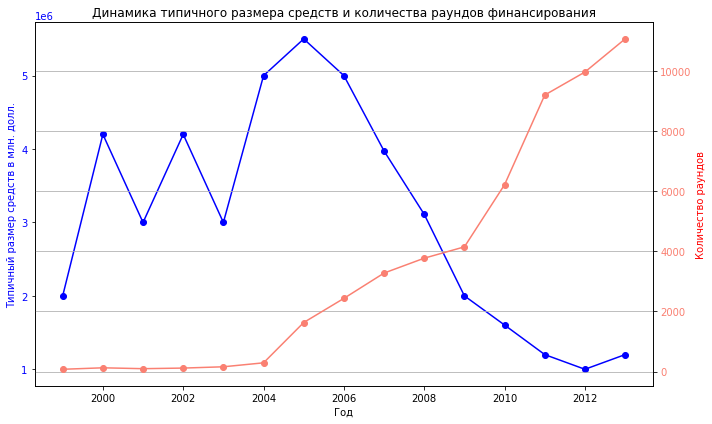

In [34]:
# Построение графика с двумя осями Y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Первая ось Y (левой)
ax1.set_xlabel('Год')
ax1.set_ylabel('Типичный размер средств в млн. долл.', color='b')
ax1.plot(filtered_rounds_by_years.index, filtered_rounds_by_years['typical_amount'], marker='o', linestyle='-', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Создание второй оси Y (правой)
ax2 = ax1.twinx()  
ax2.set_ylabel('Количество раундов', color='r')  
ax2.plot(filtered_rounds_by_years.index, filtered_rounds_by_years['rounds_count'], marker='o', linestyle='-', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

# Заголовок графика
plt.title('Динамика типичного размера средств и количества раундов финансирования')
plt.grid()

# Отображение графика
plt.tight_layout()
plt.show()

##### На основе полученных данных ответим на вопросы:

* Типичный размер собранных в рамках одного раунда средств был максимален в 2005 году.

* В 2013 году произошло увеличение по количеству раундов (нарастающая тенденция с 2004 года, рост был постоянный) и выделяемых в рамках каждого раунда средств, при этом это это был перелом постоянного падения: с 2005 года до 2012 года наюблюдалось постепенное падение типичного размера средств.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний. Оценим:

* насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Сразу заметим, что объединить возможно все три таблицы, так как во всех них идентификатор сотрудника:
- в `education` person_id — идентификатор работника,  
- в `people` id — идентификатор сотрудника,  
- в `degrees` object_id — идентификатор сотрудника.

Будем последовательное объединение: сначала первые 2 талицы, затем к ним - `degrees`. Присоединять будем к таюлице `people`, поскольку запрос идет именно на сотрудников, поэтому максимально сохраняем инормацию о сотрудниках, а уже дальше информация об образовании, используем left-присоединение.

Также заметим, что нам необходимо исключить дублирование столбцов с идетификатором сотрудника и можем удалить столбец  `id` - идентификатор записи  в `degrees`, а также	id — идентификатор записи об образовании в `education` для исключения дублирования в названии с id сотрудника в `people`.


In [35]:
# Удаление столбца id в degrees и education для исключения дублирования в названии с id сотрудника в people.
degrees.drop(columns=['id'], inplace=True)
education.drop(columns=['id'], inplace=True)

# Объединяем датафреймы
ed_peop_df = people.merge(education, left_on='id', right_on='person_id', how='left')
ed_peop_deg_df = ed_peop_df.merge(degrees, left_on='id', right_on='object_id', how='left')

# Удаление повторяющихся столбцов
ed_peop_deg_df.drop(columns=['person_id', 'object_id'], inplace=True)

# Вывод информации о получившемся датафрейме
ed_peop_deg_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370836 entries, 0 to 370835
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                370836 non-null  int64 
 1   first_name        370831 non-null  object
 2   last_name         370835 non-null  object
 3   company_id        370836 non-null  int32 
 4   network_username  81529 non-null   object
 5   instituition      212109 non-null  object
 6   graduated_at      113991 non-null  object
 7   degree_type       190722 non-null  object
 8   subject           156477 non-null  object
dtypes: int32(1), int64(1), object(7)
memory usage: 26.9+ MB


In [36]:
ed_peop_deg_df.head(3)

,id,first_name,last_name,company_id,network_username,instituition,graduated_at,degree_type,subject
0,10,Mark,Zuckerberg,5,NaN,Harvard University,NaN,NaN,Computer Science
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaN


Итак, id - идентификатор сотрудника, в получившемся датафрейме 370836 строк, то есть сотрудников, сведений о образовании меньше, но прежде чем ответить на вопросы заказчика, т.е. работать с пропусками в сведениях об образовании, надо проверить дубликаты и удалить их при совпадении одновременно в id, имени и фамилии сотрудника.

In [37]:
# Ищем дубликаты
ed_peop_deg_df.duplicated(subset=['id','first_name', 'last_name'], keep='first').sum()

144128

Дубликатов слишком много...При удалении дубликатов по сотруднику может остаться неактуальная информация, так как может остаться запись с отсутствующим образованием и удалиться запись с образованием, а значит, будет потеря данных. Также у 1 человека может быть несколько образований, например.
В связи с чем удалим только явные дубликаты.

In [38]:
ed_peop_deg_df.drop_duplicates(keep='first')

,id,first_name,last_name,company_id,network_username,instituition,graduated_at,degree_type,subject
0,10,Mark,Zuckerberg,5,NaN,Harvard University,NaN,NaN,Computer Science
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,-1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
370831,99999,Ramon,Peypoch,-1,NaN,NaN,NaN,NaN,NaN
370832,174088,Dr. Ray,Woods,188200,network,Sydney University Medical School,1982-01-01,M.B.B.S.,Medicine
370833,118386,Ricardo,Durand,143419,itechsocialnet,ESCS,2004-01-01,PhD,Journalism
370834,175827,mahesh,kumar,-1,socialnethubs,NaN,NaN,NaN,NaN


Посмотрим на долю пропусков в столбцах.

In [39]:
ed_peop_deg_df.isna().mean().sort_values(ascending=False)

network_username    0.780148
graduated_at        0.692611
subject             0.578043
degree_type         0.485697
instituition        0.428025
first_name          0.000013
last_name           0.000003
id                  0.000000
company_id          0.000000
dtype: float64

Можем оценить, насколько информация об образовании сотрудников полна:  
•	degree_type — тип образования - 49% пропусков.  
•	subject — специальность - 58% пропусков.  
•	instituition — название учебного заведения - 43% пропусков.  
•	graduated_at — дата получения образования - 69% пропусков.  
Таким образом, данные об образовании далеко не полные, но будем работать с тем, что есть.

Теперь разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп. 
Для определения границ групп необходимо посмотреть, сколько сотрудников у нас числится в каждой компании, сгруппируем данные по компаниям. 

In [40]:
# Подсчет количества сотрудников в каждой компании
employee_count = ed_peop_deg_df['company_id'].value_counts().reset_index()
employee_count.columns = ['company_id', 'employee_count']
employee_count 

,company_id,employee_count
0,-1,299967
1,59,722
2,29,393
3,1242,320
4,231067,195
...,...,...
22918,192866,1
22919,225618,1
22920,13975,1
22921,18073,1


В выдаче обратим внимание: большое количество сотрудников в компании -1: сработала наша заглушка, эти данные уберем фильтрацией.
Также заметим на большое количество 1 в последних строках. Выведем уникальное количеством столбца с количсетвом сотрудников и на основании этого примем решении о том, КАК нам делаить на группы компании.

In [41]:
employee_count=employee_count[employee_count['company_id']!=-1]
employee_count['employee_count'].unique()

array([722, 393, 320, 195, 177, 167, 138, 121, 116, 112, 103, 102,  94,
        90,  87,  86,  83,  81,  80,  78,  76,  73,  67,  65,  64,  60,
        59,  58,  57,  55,  54,  53,  52,  50,  49,  48,  47,  46,  45,
        44,  42,  41,  40,  39,  38,  37,  36,  35,  34,  33,  32,  31,
        30,  29,  28,  27,  26,  25,  24,  23,  22,  21,  20,  19,  18,
        17,  16,  15,  14,  13,  12,  11,  10,   9,   8,   7,   6,   5,
         4,   3,   2,   1])

Уникальных значений не так уж много, но компаний с 1 человеком в конце сортировки как будто много? проверим сколько. 

In [42]:
# Узнаем количество компаний с 1 сотрудником через фильтрацю строк, где employee_count = 1
count_of_a_employee_companies = len(employee_count[employee_count['employee_count'] == 1])
count_of_a_employee_companies

14150

Достаточно большое количество компаний с 1 сотрудником - 18116 (из 22921 строк). Целесообразно выделить такие компании в отдельную группу.
Скорее всего, если речь идет о стартапах - это не про большое количество сотрудников, в связи с чем выделим и условно назовем "некрупные компании" с количеством сотрудников до 5, а остальные назовем "крупные компании" с количеством 5 и более. Используем функцию для определения категории компании.

In [43]:
# Функция для определения группы по количеству сотрудников
def category_company(row):
    if row['employee_count'] == 1:
        return 'Компании с 1 сотрудником'
    elif 2 <= row['employee_count'] < 5:
        return 'Некрупные компании'
    else:
        return 'Крупные компании'

# Применение функции к DataFrame
employee_count['company_group'] = employee_count.apply(category_company, axis=1)
employee_count


,company_id,employee_count,company_group
1,59,722,Крупные компании
2,29,393,Крупные компании
3,1242,320,Крупные компании
4,231067,195,Крупные компании
5,4715,177,Крупные компании
...,...,...,...
22918,192866,1,Компании с 1 сотрудником
22919,225618,1,Компании с 1 сотрудником
22920,13975,1,Компании с 1 сотрудником
22921,18073,1,Компании с 1 сотрудником


Считаем, что категориязация прошла успешно (равные группы выделить нереально - тк. компаний с 1 сотрудником много).
Перейдем к анализу пропусков данных. Для этого необходимо столбец с группой компании company_group добавить в датафрейм ed_peop_deg_df и уже затем оценить долю пропусков через группировку.

In [44]:
# Объединяем датафреймы
ed_peop_deg_df=ed_peop_deg_df.merge(employee_count, on='company_id', how='left')
# Проверяем наличие новых столбцов в дополненном ed_peop_deg_df
ed_peop_deg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370836 entries, 0 to 370835
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                370836 non-null  int64  
 1   first_name        370831 non-null  object 
 2   last_name         370835 non-null  object 
 3   company_id        370836 non-null  int32  
 4   network_username  81529 non-null   object 
 5   instituition      212109 non-null  object 
 6   graduated_at      113991 non-null  object 
 7   degree_type       190722 non-null  object 
 8   subject           156477 non-null  object 
 9   employee_count    70869 non-null   float64
 10  company_group     70869 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 32.5+ MB


Новый столбец 'company_group' добавлен, теперь сгруппируем компании с известным company_id (не забудем про заглушку -1) по выделенным группам в зависимости от числа сотрудников и посмотрим, какой процент пропусков есть в столбцах, которые могут нам сказать об образовании, а именно: 'instituition','degree_type','subject'.  Для каждой группы по указанным столбцам (x) вычисляем долю пропущенных значений с помощью isna().mean().

In [45]:
# фильтруем компании по заглушке в company_id =-1
filtered_ed=ed_peop_deg_df[ed_peop_deg_df['company_id']!=-1]
# Узнаем долю пропусков в сведениях об образовании, группируя по company_group
miss_education = filtered_ed.groupby('company_group')['instituition','degree_type','subject'].apply(lambda x: x.isna().mean())

miss_education

,instituition,degree_type,subject
company_group,,,
Компании с 1 сотрудником,0.592862,0.639011,0.651166
Крупные компании,0.105291,0.200338,0.287240
Некрупные компании,0.209279,0.285941,0.355021


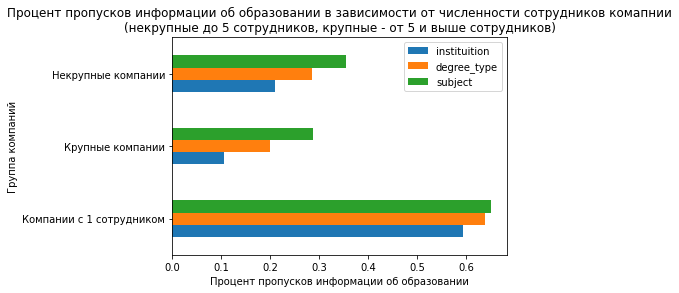

In [46]:
miss_education.plot(kind='barh')
plt.xlabel('Процент пропусков информации об образовании')
plt.ylabel('Группа компаний')
plt.title('Процент пропусков информации об образовании в зависимости от численности сотрудников комапнии\n(некрупные до 5 сотрудников, крупные - от 5 и выше сотрудников)')
plt.show()

Можем сделать вывод, что пропуски есть во всех группах компаний, но процент пропусков в сведениях об образовании в компаниях с 1 сотрудником больше, чем у других, а крупные компании лучше следят за отражением данных об образовании.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбец `network_username` встрчеается в `company_and_rounds` и `people`. С помощью pd.concat() создадим один общий датафрейм и подчситаем частоту повторений с помощью value_counts() + проанализируем количество дубликатов.

In [47]:
# Объединим датафреймы
full_df = pd.concat([company_and_rounds, people], ignore_index=True)
# Подсчет количества появлений каждого network_username
username_counts = full_df['network_username'].value_counts()
username_counts

Goodman_UK       20
IndiaMART        17
mobivery         15
tyropayments     15
network          14
                 ..
82apps            1
practicology      1
it_heroix         1
chandansraj       1
90degreemedia     1
Name: network_username, Length: 115793, dtype: int64

In [48]:
# Определение недубликатов (появляются 1 раз)
not_duplicates = username_counts[username_counts == 1].sum()
not_duplicates

104994

Из полученной информации сделаем вывод, что велико количество дубликатов - например, Goodman_UK встречается 20 раз, мы знаем, что дублировались строки с информацией об одном и том же участнике company_and_rounds (в том чиле никнейм) - для разных раундов финансирования, однако если таких повторений 20 - скорее всего здесь речь о дубликатах.
А теперь посмотрим, что 1 раз встречается в объединенном датасете 104994 никнейма. То есть эти данные могут потеряться при объединении.  

То есть нецелесообразно объединять таблицы по столбцу `network_username` в связи с:
- возможной потерей информации,
- формированием дубликатов, с которыми сложно будет дальше вести анализ.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Приведем данные в вид, который позволяет проводить анализ в разрезе отдельных компаний (можно изменять форму данных, порядок их хранения. Обращаем внимание на структуру датасета, порядок и названия столбцов, проанализируем значения).

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовим данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

При знакомстве с `company_and_rounds` было предположение об изначальном хранени информации в 2 разных датасетах, которые в итоге объединили с полным сохранением данных, но часть ячеек при этом остались с Nan. Также мы пришли в к выводу, что данные по столбцам `company_ID` и `company_id` совпадают: значит по ним сможем объединять.

Повторим шаг с выводом информации по датафрейму, чтобы еще раз проанализировать, какие стоит сделать срезы, чтобы сделать 2 новых датафрейма и корректно их объединить в дальнейшем.Помним, что часть данных заполнены заглушками.

In [49]:
# Выводим информацию о датафрейме
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_ID           217774 non-null  int32  
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           217774 non-null  int64  
 5   closed_at            217774 non-null  int64  
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217774 non-null  int16  
 10  funding_rounds       217774 non-null  int8   
 11  funding_total        217472 non-null  float64
 12  milestones           217774 non-null  int8   
 13  funding_round_id     52928 non-null   float64
 14  company_id           217774 non-null  int32  
 15  funded_at        

- с 1 по 12 столбец - это датафрейм с информацией о компаниях:    
•	company_ID — идентификатор компании.
•	name — название компании.
•	category_code — категория области деятельности компании.
•	status — статус компании.
•	founded_at — дата инвестирования.
•	closed_at — дата закрытия компании.
•	domain — официальный сайт компании.
•	network_username — ник компании в сети.
•	country_code — код страны компании.
•	investment_rounds — число инвестиционных раундов.
•	funding_rounds — число раундов финансирования.
•	funding_total — сумма финансирования.
•	milestones — вехи финансирования.  


- с 13 стоблца данные заполнены данными о раундах финансирования:  
•	funding_round_id — идентификатор этапа финансирования.
•	company_id — идентификатор компании.
•	funded_at — дата финансирования.
•	funding_round_type — тип финансирования.
•	raised_amount — сумма финансирования.
•	pre_money_valuation — предварительная денежная оценка.
•	participants — число участников.
•	is_first_round — является ли раунд первым.
•	is_last_round — является раунд последним.

Разделяем на 2 датафрейма: `company`, `rounds`.

In [50]:
company=company_and_rounds[['company_ID', 
                               'name', 
                               'category_code', 
                               'status', 
                               'founded_at', 
                               'closed_at', 
                               'domain', 
                               'network_username', 
                               'country_code', 
                               'investment_rounds', 
                               'funding_rounds', 
                               'funding_total', 
                               'milestones']]

company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   company_ID         217774 non-null  int32  
 1   name               217472 non-null  object 
 2   category_code      143886 non-null  object 
 3   status             217472 non-null  object 
 4   founded_at         217774 non-null  int64  
 5   closed_at          217774 non-null  int64  
 6   domain             147159 non-null  object 
 7   network_username   95534 non-null   object 
 8   country_code       108607 non-null  object 
 9   investment_rounds  217774 non-null  int16  
 10  funding_rounds     217774 non-null  int8   
 11  funding_total      217472 non-null  float64
 12  milestones         217774 non-null  int8   
dtypes: float64(1), int16(1), int32(1), int64(2), int8(2), object(6)
memory usage: 16.6+ MB


In [51]:
rounds = company_and_rounds[['funding_round_id', 
                              'company_id', 
                              'funded_at', 
                              'funding_round_type', 
                              'raised_amount', 
                              'pre_money_valuation', 
                              'participants', 
                              'is_first_round', 
                              'is_last_round']]


Теперь проверим и удалим явные дубликаты в обоих датафреймах.

In [52]:
# Прoверяем количество дубликатов в company
company.duplicated().sum()


21220

In [53]:
# Прoверяем количество дубликатов в rounds
rounds.duplicated().sum()


164845

In [54]:
# Удаляем дубликаты
company=company.drop_duplicates()
rounds=rounds.drop_duplicates()

In [55]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   company_ID         196554 non-null  int32  
 1   name               196553 non-null  object 
 2   category_code      123186 non-null  object 
 3   status             196553 non-null  object 
 4   founded_at         196554 non-null  int64  
 5   closed_at          196554 non-null  int64  
 6   domain             126545 non-null  object 
 7   network_username   80591 non-null   object 
 8   country_code       87990 non-null   object 
 9   investment_rounds  196554 non-null  int16  
 10  funding_rounds     196554 non-null  int8   
 11  funding_total      196553 non-null  float64
 12  milestones         196554 non-null  int8   
dtypes: float64(1), int16(1), int32(1), int64(2), int8(2), object(6)
memory usage: 16.5+ MB


In [56]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52929 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   funding_round_id     52928 non-null  float64
 1   company_id           52929 non-null  int32  
 2   funded_at            52929 non-null  int64  
 3   funding_round_type   52928 non-null  object 
 4   raised_amount        52928 non-null  float64
 5   pre_money_valuation  52928 non-null  float64
 6   participants         52929 non-null  int8   
 7   is_first_round       52929 non-null  int8   
 8   is_last_round        52929 non-null  int8   
dtypes: float64(3), int32(1), int64(1), int8(3), object(1)
memory usage: 2.8+ MB


По итогу мы имеем 2 разных датасета с информацией о компаниях и о раундах финансирования, которые в дальнейшем можем объединять как друг с другом (чтобы потдянуть информацию о компании, например) или с другими таблицами (возможно, для анализа покупок компаний с  `acquisition`).


## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv` — выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.



In [57]:
# Формируем датафрейм, делая выборку по заданным условиям
final_company=company[(company['funding_rounds'] > 0) | (company['investment_rounds'] > 0) | (company['status']=='acquired')]
final_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_ID         40747 non-null  int32  
 1   name               40747 non-null  object 
 2   category_code      35315 non-null  object 
 3   status             40747 non-null  object 
 4   founded_at         40747 non-null  int64  
 5   closed_at          40747 non-null  int64  
 6   domain             35754 non-null  object 
 7   network_username   20850 non-null  object 
 8   country_code       34742 non-null  object 
 9   investment_rounds  40747 non-null  int16  
 10  funding_rounds     40747 non-null  int8   
 11  funding_total      40747 non-null  float64
 12  milestones         40747 non-null  int8   
dtypes: float64(1), int16(1), int32(1), int64(2), int8(2), object(6)
memory usage: 3.4+ MB


In [58]:
final_company.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005,0,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5
3,10,Flektor,games_video,acquired,0,0,flektor.com,NaN,USA,0,0,0.0,0
4,100,There,games_video,acquired,0,0,there.com,NaN,USA,0,0,0.0,4
15,1001,FriendFeed,web,acquired,2007,0,friendfeed.com,friendfeed,USA,0,1,5000000.0,3
20,10014,Mobclix,mobile,acquired,2008,0,mobclix.com,mobclix,USA,0,1,0.0,4


Отлично, осталось только 40747 строк. Присоединим к ним информацию из `acquisition`, который содержит информацию о покупках одними компаниями других компаний и поскольку заказчика интересуют компании, которые меняли или готовы менять владельцев, то присоединяем данные left-ом по столбцу 'acquired_company_id' — идентификатор покупаемой компании.


In [59]:
company_and_acquisition=final_company.merge(acquisition, left_on='company_ID',right_on='acquired_company_id',how='left')
company_and_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company_ID            40890 non-null  int32  
 1   name                  40890 non-null  object 
 2   category_code         35436 non-null  object 
 3   status                40890 non-null  object 
 4   founded_at            40890 non-null  int64  
 5   closed_at             40890 non-null  int64  
 6   domain                35883 non-null  object 
 7   network_username      20938 non-null  object 
 8   country_code          34858 non-null  object 
 9   investment_rounds     40890 non-null  int16  
 10  funding_rounds        40890 non-null  int8   
 11  funding_total         40890 non-null  float64
 12  milestones            40890 non-null  int8   
 13  id                    9390 non-null   float64
 14  acquiring_company_id  9390 non-null   float64
 15  acquired_company_id

In [60]:
company_and_acquisition.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,Wetpaint,web,operating,2005,0,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5,NaN,NaN,NaN,NaN,NaN,NaN
1,10,Flektor,games_video,acquired,0,0,flektor.com,NaN,USA,0,0,0.0,0,1.0,11.0,10.0,NaN,20000000.0,2007.0
2,100,There,games_video,acquired,0,0,there.com,NaN,USA,0,0,0.0,4,20.0,377.0,100.0,cash,0.0,2005.0
3,1001,FriendFeed,web,acquired,2007,0,friendfeed.com,friendfeed,USA,0,1,5000000.0,3,1901.0,5.0,1001.0,cash_and_stock,47500000.0,2009.0
4,10014,Mobclix,mobile,acquired,2008,0,mobclix.com,mobclix,USA,0,1,0.0,4,3878.0,23054.0,10014.0,NaN,0.0,2010.0


Данные корректно объединились.   
По цифрам 9390 ненулевых значений 'acquiring_company_id' из более, чем 40 000 строк понимаем, что покупаемых компаний примерно пятая часть.

Далее будем работать только с этими данными.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся. Здесь разделим значения `funding_total` на 1 000 000 и будем считать в млн.долл.

* В процессе расчёта значений обратим внимание, например, на показатели, возвращаемые методом `.describe()`и ответим на вопрос, применимы ли к таким данным обычные способы нахождения типичных значений?

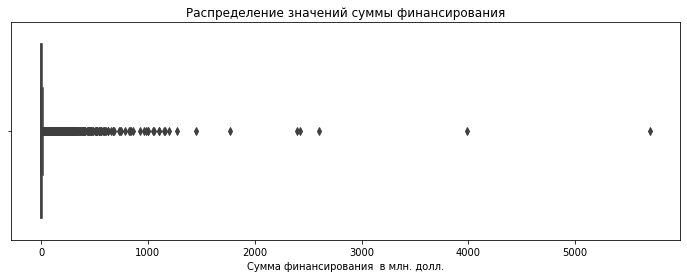

In [61]:
# Разделим значения funding_total на 1 000 000 и будем считать в млн.долл.
company_and_acquisition['funding_total']=company_and_acquisition['funding_total']/1000000

# Построение графика Boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(company_and_acquisition['funding_total'])
plt.title('Распределение значений суммы финансирования')
plt.xlabel('Сумма финансирования  в млн. долл.')
plt.show()




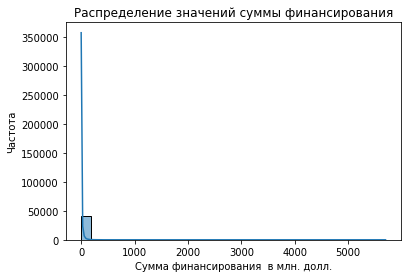

In [62]:
# Построение гистограммы
sns.histplot(company_and_acquisition['funding_total'], bins=30, kde=True)
plt.title('Распределение значений суммы финансирования')
plt.xlabel('Сумма финансирования  в млн. долл.')
plt.ylabel('Частота')
plt.show()

Однозначино видим большое количество нулевого финансирования, а также большие выбросы, даже за 5 000 млн. долл.
Ящик с усами совсем неинформативен из-за большого количества выбросов, скроем их на графике через showfliers=False и посмотрим на статичтические характеристики через describe()

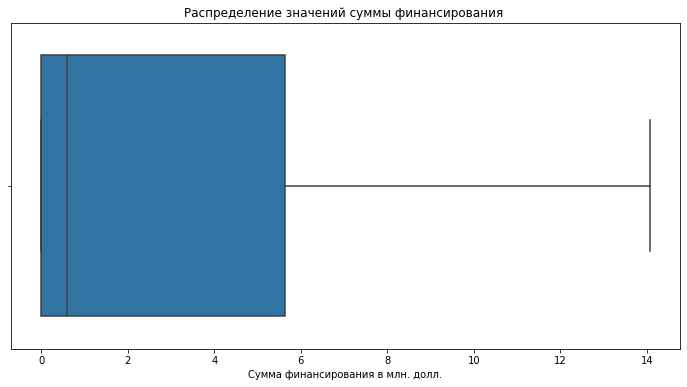

In [63]:
# Построение графика без выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(company_and_acquisition['funding_total'], showfliers=False)
plt.title('Распределение значений суммы финансирования ')
plt.xlabel('Сумма финансирования в млн. долл.')
plt.show()

In [64]:
company_and_acquisition['funding_total'].describe()

count    40890.000000
mean        10.135586
std         56.412887
min          0.000000
25%          0.000000
50%          0.600000
75%          5.631320
max       5700.000000
Name: funding_total, dtype: float64

Судя по графику и цифрам метода describe(), суммы финансирования начинаются с 0 и 25 процентиль нулевой (что очень странно), максимум - 5700 млн. долл.
Также очень большие выбросы, видимые на 1 графике. И размер std весомый, среднее значение отличается значительно от медианы, в т.ч. за счет выбросов. Медиана в отметке 0.6 млн. долл. 
Вероятно, к таким данным обычные способы нахождения типичных значений не применимы, так как стартапы бывают разные, и суммы финансирования могут очень сильно разнится.



### 3.3. Куплены забесплатно?

* Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажем, каким процентилям границы соответствуют.

In [65]:
# Фильтруем данные по условиям покупки за 0 или 1 доллар и ненулевому финансированию
unpaid_company_and_acquisition=company_and_acquisition[
    (company_and_acquisition['price_amount'].isin([0, 1]))&(company_and_acquisition['funding_total'] > 0)]
# Выведем стат.показатели
unpaid_company_and_acquisition['funding_total'].describe()

count    1618.000000
mean       18.152962
std       144.503027
min         0.003750
25%         2.000000
50%         6.000000
75%        15.500000
max      5700.000000
Name: funding_total, dtype: float64

Для аналитического расчета верхней и нижней границы выбросов используем метод межквартильного размаха (IQR).   
Сначала найдем первый квартиль (Q1) и третий квартиль (Q3), зетем квартильный размах (IQR = Q3 - Q1), а затем определим границы выбросов:
   - Нижняя граница: Q1 - 1.5 * IQR
   - Верхняя граница: Q3 + 1.5 * IQR

Используем функцию lt() и gt() для расчета того, какой процент данных меньше нижней границы и больше верхней границы.
lt() - (less than) возвращает True для каждой записи, которая меньше заданного значения; gt() - (greater than) возвращает True для каждой записи, которая больше заданного значения. mean() - среднее значение фактически дает долю True значений в общей выборке и далее * 100, чтобы долю перевести в проценты.

In [66]:
# Вычисляем Q1, Q3 и IQR
Q1 = unpaid_company_and_acquisition['funding_total'].quantile(0.25)
Q3 = unpaid_company_and_acquisition['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов
lower_bound = Q1 - 1.5 * IQR # здесь не может быть отрицательного финансирования, поэтому ограничиваем выбросы 0
upper_bound = Q3 + 1.5 * IQR

# Определяем, каким процентилям соответствуют границы
lower_percentile = unpaid_company_and_acquisition['funding_total'].lt(lower_bound).mean() * 100
upper_percentile = unpaid_company_and_acquisition['funding_total'].gt(upper_bound).mean() * 100

display(f"Нижняя граница выбросов: {lower_bound} млн.")
display(f"Верхняя граница выбросов: {upper_bound} млн.")
display(f"Нижняя граница соответствует примерно {lower_percentile:.2f}% данных.")
display(f"Верхняя граница соответствует примерно {upper_percentile:.2f}% данных.")

'Нижняя граница выбросов: -18.25 млн.'

'Верхняя граница выбросов: 35.75 млн.'

'Нижняя граница соответствует примерно 0.00% данных.'

'Верхняя граница соответствует примерно 9.09% данных.'

Нижняя граница выбросов отрицательная и таких данных будет 0%, так как не может быть отрицательного финансирования.
Добавим в код условие, отсекая отрицательные значения через выборку максимума из 0 или Q1 - 1.5 * IQR и оценим, изменятся ли % данных, которым соответствует граница выбросов.

In [67]:
# Вычисляем Q1, Q3 и IQR
Q1 = unpaid_company_and_acquisition['funding_total'].quantile(0.25)
Q3 = unpaid_company_and_acquisition['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов
lower_bound = max(0, Q1 - 1.5 * IQR) # не может быть отрицательного финансирования, поэтому ограничиваем выбросы 0
upper_bound = Q3 + 1.5 * IQR

# Определяем, каким процентилям соответствуют границы
lower_percentile = unpaid_company_and_acquisition['funding_total'].lt(lower_bound).mean() * 100
upper_percentile = unpaid_company_and_acquisition['funding_total'].gt(upper_bound).mean() * 100

display(f"Нижняя граница выбросов: {lower_bound} млн.")
display(f"Верхняя граница выбросов: {upper_bound} млн.")
display(f"Нижняя граница соответствует примерно {lower_percentile:.2f}% данных.")
display(f"Верхняя граница соответствует примерно {upper_percentile:.2f}% данных.")

'Нижняя граница выбросов: 0 млн.'

'Верхняя граница выбросов: 35.75 млн.'

'Нижняя граница соответствует примерно 0.00% данных.'

'Верхняя граница соответствует примерно 9.09% данных.'

Картина не изменилась. Нижняя граница соответствует 0% данных, верхняя - 9%.

Заказчик планирует заменить границы на значения, рассчитанные по процентилям: рассмотрим, например, 1-й и 99-й процентиль.

In [68]:
unpaid_company_and_acquisition['funding_total'].describe(percentiles=[0.01,0.99])

count    1618.000000
mean       18.152962
std       144.503027
min         0.003750
1%          0.020000
50%         6.000000
99%       151.552930
max      5700.000000
Name: funding_total, dtype: float64

Через межквартильный размах нижняя граница выбросов: нулевая (или даже отрицательная), верхняя граница выбросов: 35.75 млн., тогда как через процентили: 1%     -     0.02000, 99%   -    151.552930. Цифры значительно отличаются. 

Можно сделать вывод о некорректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

Если бы данные имели нормальное распределение, использование процентилей было бы скорее всего адекватным, а у нас данные имеют асимметричное распределение, и имеется значительное количество выбросов, замена границ по процентилям может скрыть важные моменты в данных.


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

* наибольшими типичными  ценами;
* и наибольшим разбросом цен за стартап.

Будем работать с компаниями, у которых ненулевая стоимость, группировку делаем по `category code` — категория области деятельности компании. 

In [69]:
# Фильтруем данные по условию покупки не за 0 
n0_company_and_acquisition=company_and_acquisition[company_and_acquisition['price_amount']!=0]
# Установка формата вывода
pd.options.display.float_format = '{:.2f}'.format  # Форматируем до двух десятичных знаков 

n0_company_and_acquisition['price_amount'].describe()



count            2473.00
mean       1495976014.75
std       52304386698.95
min                 1.00
25%          12700000.00
50%          56000000.00
75%         265000000.00
max     2600000000000.00
Name: price_amount, dtype: float64

Под типичными ценами рассматриваем медиану (среднее значение значительно отличается от медианы, стандартное отклонение очень высокое). А разброс цен рассмотриваем через расчет std. 

In [70]:
# Группировка данных по категориям
grouped_category = n0_company_and_acquisition.groupby('category_code')['price_amount'].agg(['median', 'std', 'count'])
# Сбрасываем индекс
grouped_category=grouped_category.reset_index()
# Переименование столбцов
grouped_category = grouped_category.rename(columns={
    'median': 'median_price',
    'std': 'std_price',
    'count': 'count'})

# Сортировка по возрастанию медианы
sorted_by_median = grouped_category.sort_values(by='median_price',ascending=False).head(10)
sorted_by_median

,category_code,median_price,std_price,count
2,automotive,2400000000.00,2581669292.02,3
38,sports,622500000.00,512652416.36,2
24,nanotech,584000000.00,NaN,1
32,real_estate,400000000.00,2676302206.40,6
19,manufacturing,351000000.00,1060434506.33,21
39,transportation,230000000.00,572625532.09,3
3,biotech,200000000.00,1968195263.66,263
1,analytics,200000000.00,92967736.34,3
10,fashion,195000000.00,86494219.46,3
4,cleantech,185000000.00,874419628.26,39


При выводе топ-10 компаний по категориям видим, что значения медианы в строках 6-10 повторяются или находятся близко друг к другу -около 200000000, поэтому наглядной картины они нам не дадут, в связи с чем предлагается оставить топ-5 компаний с типичными ценами выше 300 000 000. По аналогии сделаем  и с std. Проанализируем, есть ли пересечния или такой выборки недостаточно.


In [71]:
# Сортировка по убыванию по медиане и вывод топ-5
sorted_by_median = grouped_category.sort_values(by='median_price',ascending=False).head()
display("Топ-5 категорий по наибольшим типичным  ценам:")
display(sorted_by_median)



'Топ-5 категорий по наибольшим типичным  ценам:'

,category_code,median_price,std_price,count
2,automotive,2400000000.00,2581669292.02,3
38,sports,622500000.00,512652416.36,2
24,nanotech,584000000.00,NaN,1
32,real_estate,400000000.00,2676302206.40,6
19,manufacturing,351000000.00,1060434506.33,21


In [72]:
# Сортировка по убыванию по std и вывод топ-5
sorted_by_median = grouped_category.sort_values(by='std_price',ascending=False).head()
display("Топ-5 категорий по наибольшему разбросу цен за стартап:")
display(sorted_by_median)

'Топ-5 категорий по наибольшему разбросу цен за стартап:'

,category_code,median_price,std_price,count
9,enterprise,54750000.00,241358098250.90,116
31,public_relations,110000000.00,6854337755.92,74
32,real_estate,400000000.00,2676302206.40,6
2,automotive,2400000000.00,2581669292.02,3
28,other,71550000.00,2060860617.08,84


Исходя из данных двух тыблиц, можно сделать вывод о достаточности сведений для заказика  по рисковым проектам. Также по 2 категориям находятся пересечения (вероятно, именно они будут интересны в первую очередь):
- automotive - на 1 месте по типичным ценам и на 4 - по разбросу цен;  
- real_estate, занимающая 4 место по медианным ценам и 3 место по разбросу цен. 


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуем значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. 

Для начала посмотрим, сколько бывает раундов финансирования через уникальные значения и на стат. характеристики.

In [73]:
company_and_acquisition['funding_rounds'].unique()


array([ 3,  0,  1,  5,  2,  7,  4,  6,  8, 10,  9, 13, 11, 15, 14, 12],
      dtype=int8)

In [74]:
company_and_acquisition['funding_rounds'].describe()

count   40890.00
mean        1.29
std         1.26
min         0.00
25%         1.00
50%         1.00
75%         2.00
max        15.00
Name: funding_rounds, dtype: float64

Уникальных значений не так много, раундов финанирования может быть до 15. Среднее и медиана не сильно отличаются, разброс значений небольшой. Сгруппируем данные по среднему значению, помня с начала исследования, что статуса всего 4: «действующий», «приобретенный», «закрытый», «ipo» - первая публичная продажа акций неограниченному кругу лиц.

In [75]:
# Группировка по статусу и вычисление среднего количества раундов
average_funding_rounds = company_and_acquisition.groupby('status')['funding_rounds'].mean().reset_index()
# Добавим сортировку
average_funding_rounds=average_funding_rounds.sort_values(by='funding_rounds', ascending=False)
average_funding_rounds

,status,funding_rounds
2,ipo,1.93
3,operating,1.52
1,closed,1.38
0,acquired,0.53


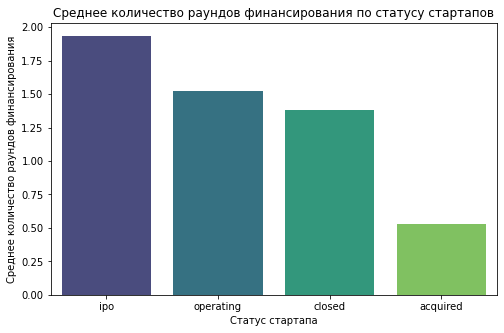

In [76]:
# Построение графика
plt.figure(figsize=(8, 5))
sns.barplot(data=average_funding_rounds, x='status', y='funding_rounds', palette='viridis')
plt.title('Среднее количество раундов финансирования по статусу стартапов')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов финансирования')
plt.show()

В основном раундов финансирования 1-2. Для интересующего заказчика статуса 'acquired' среднее число раундов финансирования 0,53, что может говорить, что уже после 1 этапа финансирования на компанию был спрос. И это действительно самая интереснаям группа для исследований.
Наибольшее среднее число раундов - почти 2 - финансирования у статуса «ipo» - первый листинг на бирже, за ними действующие компании (operating) и затем закрытые (closed). Вероятно, на 2 этапе финасирования можно понять, пойдет или не пойдет стартап, поэтому уже можно или продолжать, или закрыть сразу без дальнеших вложений. 


    
Обычно до стадии IPO доходят только самые успешные стартапы и соответственно число раундов финансирования, как правило, больше чем у остальных стадий развития стартапов.



## Шаг 4. Итоговый вывод и рекомендации


1. **Общий обзор проделанной работы**  
- Были загружены данные, необходимые для анализа, из 5 датасетов:  
сompany_and_rounds.csv - cодержит информацию о компаниях и раундах финансирования,  
acquisition.csv - содержит информацию о покупках одними компаниями других компаний,  
people.csv - cодержит информацию о сотрудниках,  
education.csv - cодержит информацию об образовании сотрудника,  
degrees.csv - cодержит информацию о типе образования сотрудника.  

- Датафрейм `сompany_and_rounds` был сначала разделен на 2 - `сompany` и `rounds`, затем данные из `сompany` объединены с `acquisition` для удобства анализа. 
- Объединены 3 датафрейма для анализа сведений по образованию сотрудников `people`, `education`, `degrees`.  
- В этот объединенный датафрейм добавлен новый столбец 'company_group', разделяющий компании на 3 группы: с 1 сотрудником, с числом сотрудников от 2 до 5 (некрупные компании), и от 5 человек и больше (крупные компании).
- Удалены явные дубликаты, пропуски макисмально не удалялись в целях сохранения данных, при необходимости менялись на заглушки, что учитывалось при анализе.
- В столбцах `founded_at`, `closed_at`, `funded_at` установлен сначала тип даты и времени, далее выделен год и установлен int, как и для столбцов с id компании,  `investment_rounds`,`funding_rounds`, `milestones`, `participants` и булевых столбцах  `is  first  round` и `is  last  round`  - с возможным снижением размерности.  


2. **Ответы на исследовательские вопросы**
- Раунды финансирования по годам:
Типичный размер собранных в рамках одного раунда средств был максимален в 2005 году. В 2013 году произошло увеличение по количеству раундов (нарастающая тенденция с 2004 года, рост был постоянный) и выделяемых в рамках каждого раунда средств, при этом это это был перелом постоянного падения: с 2005 года до 2012 года наюблюдалось постепенное падение типичного размера средств.

- Люди и их образование:
Данные об образовании далеко не полные, доля пропусков от 43 до 69% по столбцам с образованием, но по оценкам средней доли сотрудников без информации об образовании в каждой из групп можно прийти к выводу, что процент пропусков в сведениях об образовании в компаниях с 1 сотрудником больше, чем у других, а самый мелнький процент пропусков в крупных компаниях. 

- Объединять или не объединять по столбцу `network_username`, который встречается в нескольких датасетах:
нельзя объединять, так как результат может получиться некорректным: слишком много пропусков и дубликатов. 

- Проблемный датасет: 
`сompany_and_rounds` был сразделен на 2: `сompany` и `rounds` - именно так данные изначально скорее всего хранились и были некорректно объединены, что привело к большому количеству пропусков и дубликатов.

- Анализ выбросов (обычный для рассматриваемого периода размер средств, который предоставлялся компаниям):
Суммы финансирования, включая 25 процентиль нулевые, максимум - 5700 млн. долл. Выявлены очень большие выбросы (свыше 5 000 млн. долл.), среднее отклонение весомое, среднее значение (0.6 млн. долл.) отличается значительно от медианы в 10 млн. долл. 
Вероятно, к таким данным обычные способы нахождения типичных значений: стартапы бывают разные и в разных отраслях, что-то сразу "выстреливает" при минимальном финансировании, а какие-то разработки требют огромных вложений (например, в медицинской отрали), но потом все же могут принести прибыль.

- Исследование компаний, которые были проданы за ноль или за один доллар:
Через межквартильный размах нижняя граница выбросов: нулевая (или даже отрицательная), верхняя граница выбросов: 35.75 млн., Цифры значительно отличаются от расчетов выбросов через 1 и 99 процентиль: 1%     -     0.02000, 99%   -    151.552930.  

- Цены стартапов по категориям:
Топ-5 категорий по наибольшим типичным  ценам:	automotive, sports, nanotech, real_estate, manufacturing.  
Топ-5 категорий по наибольшему разбросу цен за стартап: enterprise, public_relations, real_estate, automotive, other.

- Сколько раундов продержится стартап перед покупкой: 
Для интересующего заказчика статуса 'acquired' среднее число раундов финансирования 0,53. Среднее число раундов для всех статусов 1-2.


3. **Рекомендации на основе анализа данных**

По результатм исследования можно сказать о некорректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.   
По рисковым проектам в топ-5 наиболее интересны категории, которые находятся пересечения и по типичным ценам и по разбросу цен:
- automotive - на 1 месте по типичным ценам и на 4 - по разбросу цен;  
- real_estate, занимающая 4 место по медианным ценам и 3 место по разбросу цен.  

Рекомендуется  рассмотреть выдачу льготных займов стартапам: вложения могут окупиться уже после 1 раунда финансирования, однако заставляют сомневаться в полученных результатах  - исследования в разрезе компаний за 0 или 1 доллар и анализ выбросов. Вероятно, в данных где-то есть ошибки, как уже выявленные в процессе анализа некорректные объединения таблиц.